In [80]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
def randomly_crop_string(lst):
    crop_length = random.randint(2, 13)
    # print(crop_length)

    start_index = random.randint(0, len(lst) - crop_length)
    return lst[start_index:start_index + crop_length]

def get_diagonals(matrix):
    diagonals = []
    rows, cols = matrix.shape

    # Lower diagonals
    for i in range(1, rows):
        diagonal = matrix.diagonal(offset=-i)
        if len(diagonal) >= 1:
            diagonals.append(diagonal)

    return diagonals



In [82]:
def display_heatmap(matrix,figsize=(16,9)):
    plt.figure(figsize=figsize)
    ax = sns.heatmap(matrix, annot=True, cmap='coolwarm', cbar=False)
    plt.show()

def create_arr(randomise=False,val=None):
    if randomise:
        l = random.choices([0,1,2,3,4,5,6,7,8,9],k=random.randint(2,15))
        l = [1,9,3,4,5,8,6,7,2,1]
        l = [9,9,1,0,0,1,0]
        l = val
        
    else:
        l = [str(x) for x in range(1, 2 + random.randint(1, 10000))]
        l = ''.join(l)

        try:
            l = [int(x) for x in randomly_crop_string(l)]
        except ValueError:
            print(l)
            print('error')

    return len(l), np.array([list(l)],dtype=int).reshape(1,-1)

def findString(randomise=False,visualise=True,val=None):
    print(val)
    n, array = create_arr(randomise=randomise,val=val)
    ones = np.ones(shape=(n,1),dtype=int)
    m1 = array.T @ ones.T - ones @ array

    if visualise:
        print(array)
        display_heatmap(m1)

    return m1, array

[3, 5, 3, 6, 3, 7, 3, 8, 3, 9, 4, 0, 4, 1, 4, 2]
[[3 5 3 6 3 7 3 8 3 9 4 0 4 1 4 2]]


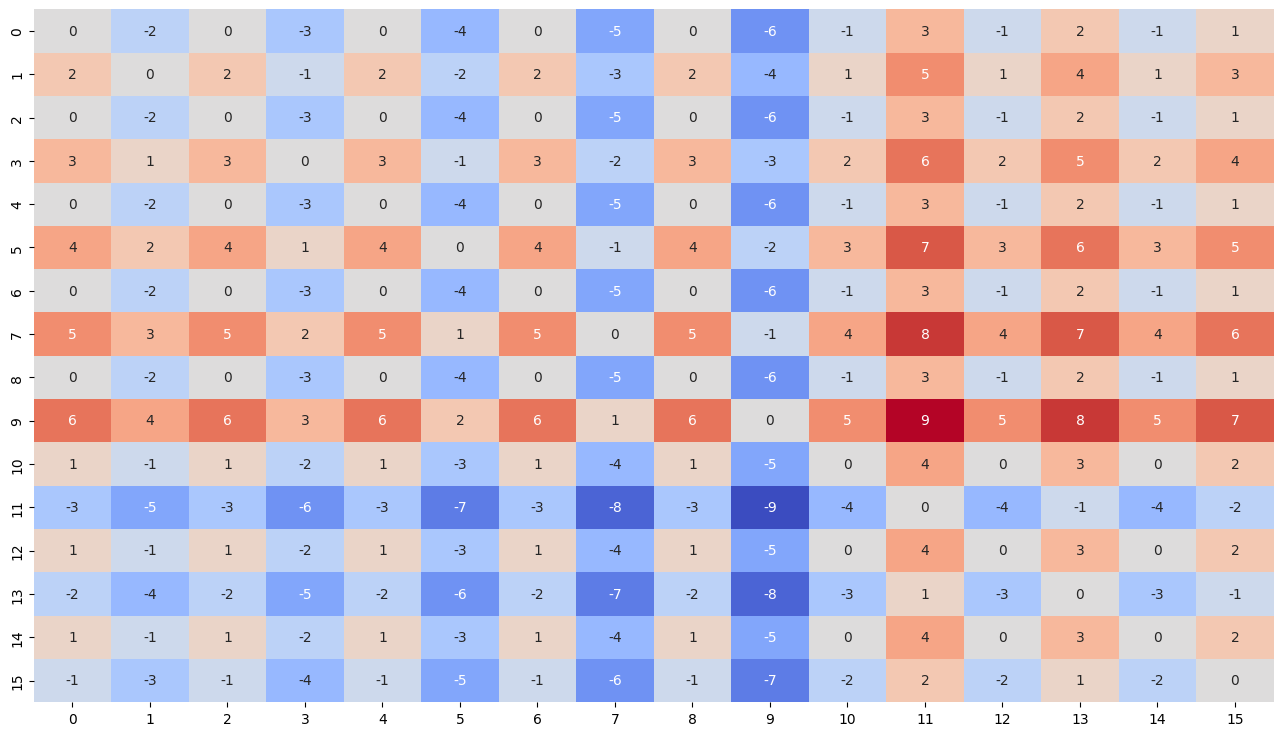

['9', '5', '9', '6', '9', '7', '9', '8', '9', '9', '1', '0', '0', '1', '0', '1', '1', '0', '2', '1', '0', '3', '1', '0', '4']
[[9 5 9 6 9 7 9 8 9 9 1 0 0 1 0 1 1 0 2 1 0 3 1 0 4]]


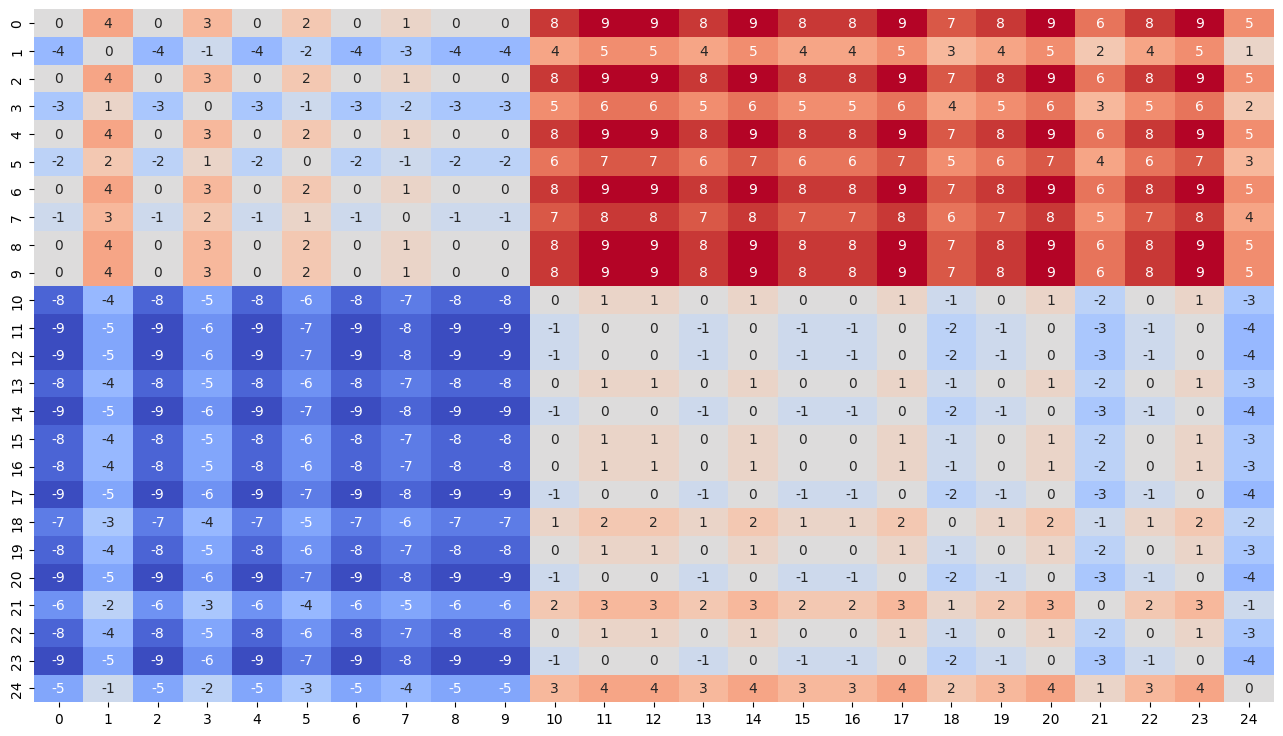

In [84]:
# m1, array = findString(randomise=True,visualise=True)
# l_arrays = get_diagonals(m1)

# print(l_arrays) # offdiagonalness is the length of the number; first number after 1 is start of new number 

# you take the first one where there is no 1 before the -1 

# m1, array = findString(randomise=True,visualise=True, val=[1,1,1,2,1,3,1,4,4, 1, 3, 1, 2, 1, 1, 1])




l1 = ''.join([str(x) for x in range(0,15)])

l2 = ''.join([str(x) for x in range(95,105)])

m1, array = findString(randomise=True,visualise=True, val=[3,5,3,6,3,7,3,8,3,9,4,0,4,1,4,2])

m1, array = findString(randomise=True,visualise=True, val=list(l2))

In [5]:
[1,-8] # if you see this then all the integers need to 9s before the last digit, if so its a unique number, otherwise is is not 

[1, -8]

In [22]:
N = ''.join([str(x) for x in range(1,100)])

P = [x for x in range(1,len(list(N)))]

print([int(x) for x in list(N)])
print(P)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 0, 1, 1, 1, 2, 1, 3, 1, 4, 1, 5, 1, 6, 1, 7, 1, 8, 1, 9, 2, 0, 2, 1, 2, 2, 2, 3, 2, 4, 2, 5, 2, 6, 2, 7, 2, 8, 2, 9, 3, 0, 3, 1, 3, 2, 3, 3, 3, 4, 3, 5, 3, 6, 3, 7, 3, 8, 3, 9, 4, 0, 4, 1, 4, 2, 4, 3, 4, 4, 4, 5, 4, 6, 4, 7, 4, 8, 4, 9, 5, 0, 5, 1, 5, 2, 5, 3, 5, 4, 5, 5, 5, 6, 5, 7, 5, 8, 5, 9, 6, 0, 6, 1, 6, 2, 6, 3, 6, 4, 6, 5, 6, 6, 6, 7, 6, 8, 6, 9, 7, 0, 7, 1, 7, 2, 7, 3, 7, 4, 7, 5, 7, 6, 7, 7, 7, 8, 7, 9, 8, 0, 8, 1, 8, 2, 8, 3, 8, 4, 8, 5, 8, 6, 8, 7, 8, 8, 8, 9, 9, 0, 9, 1, 9, 2, 9, 3, 9, 4, 9, 5, 9, 6, 9, 7, 9, 8, 9, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108,

In [24]:
def aupto(limit):
    s, alst = "", []
    for k in range(1, limit+1):
        sk = str(k)
        if sk in s: alst.append(k)
        s += sk
    return alst
print(aupto(171))

[12, 21, 23, 31, 32, 34, 41, 42, 43, 45, 51, 52, 53, 54, 56, 61, 62, 63, 64, 65, 67, 71, 72, 73, 74, 75, 76, 78, 81, 82, 83, 84, 85, 86, 87, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 110, 111, 112, 121, 122, 123, 131, 132, 141, 142, 151, 152, 161, 162, 171]


You have to think about how your pattern 𝑃 can be generated. \
Is it generated by a single number? By two number? By more than two numbers? \
(ex: 324 can be generated by 23 24) \
By more numbers? \
Once you found the way to generate 𝑃 the earliest, only a little bit more work is required to get the index. \
I have no time to type out a full answer right now but maybe this can help you.

In [66]:
def generate_slices(s):
    if not s:
        return [[]]

    slices = []
    for i in range(1, len(s) + 1):
        left_slice = s[:i]
        right_slices = generate_slices(s[i:])
        for rs in right_slices:
            slices.append([str(left_slice)] + rs)

    return slices

# Test the function with the given string '456'
s = str('324')
all_slices = generate_slices(s)
# print(all_slices[1:-1])

for candidate in all_slices[1:-1]:
    print(candidate)
    c = 0
    while c < len(candidate):
        print(candidate[c])
        c = c + 1
        # if 




['3', '24']
3
24
['32', '4']
32
4


In [79]:
35

50619

In [ ]:
def find_position(string):

    # Build a window of size len(string) and init from 1 -> m
    windowSize = len(string)
    window = [str(i) for i in range(1, windowSize + 1)]
    result = ''.join(window)

    # Loop till match
    while string not in result:

        # Remove front and add back
        window.append(str(int(window[-1]) + 1))

        # Join window and match
        result = ''.join(window)

    return result.index(string)


find_position('12346')